Using cpu device


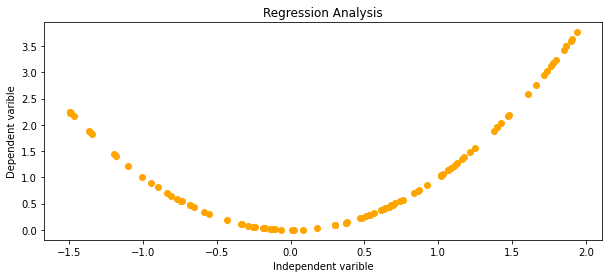

Net(
  (hidden): Linear(in_features=1, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=1, bias=True)
)
Epoch: 1
Epoch: 101
Epoch: 201
Epoch: 301
rendering image


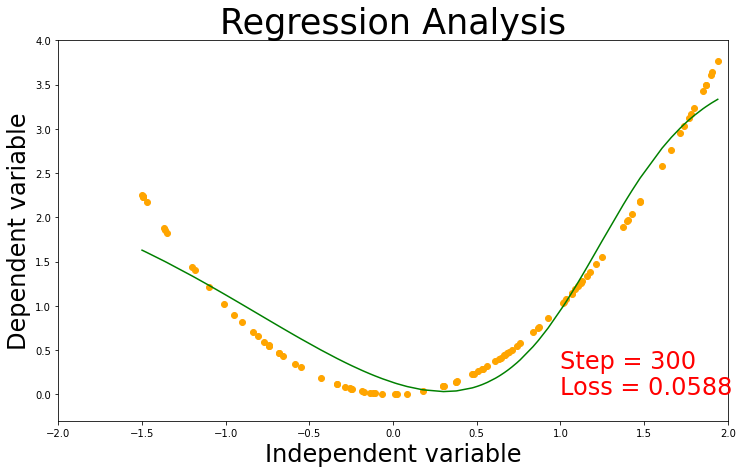

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# torch.manual_seed(1)    # reproducible

# x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
# y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

import pandas as pd

df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")
df_train_sorted = df_train.sort_values(by="x", ignore_index=True)
df_train_sorted.y += 130
df_train_sorted.y /= 90

x = torch.unsqueeze(torch.from_numpy(df_train_sorted.loc[:,"x"].values), dim=1)
y = torch.unsqueeze(torch.from_numpy(df_train_sorted.loc[:,"y"].values), dim=1)

# torch can only train on Variable, so convert them to Variable
x_1, y_1 = x,y
x, y = Variable(x).to(device), Variable(y).to(device)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x_1.data.numpy(), y_1.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=5, n_output=1).to(device)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(301):
    if t % 100 == 0: 
        print(f"Epoch: {t+1}")
    prediction = net(x.float())     # input x and predict based on x

    loss = loss_func(prediction, y.float())     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-2, 2)
    # ax.set_ylim(-150, 250)
    ax.set_ylim(-0.3, 4)
    ax.scatter(x_1.data.numpy(), y_1.data.numpy(), color = "orange")
    ax.plot(x_1.data.numpy(), prediction.cpu().data.numpy(), 'g')
    # ax.text(1.0, 40, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0.3, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.cpu().data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
print("rendering image")
# save images as a gif    
imageio.mimsave('./curve_square_simple.gif', my_images, fps=20)

In [ ]:
# for 1 neuron /15
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# for 1 neuron
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# for / 15
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# for / 45
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# for -40 / 45
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# for -40
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# for -130
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
# exctract weights from net neural network model
print(f"Weights: {net.predict.weight.cpu().data.numpy()}")
print(f"Weights: {net.hidden.weight.cpu().data.numpy()}")

Weights: [[ 1.4334232  1.8508449 -0.6174508 -4.431663   2.3314683]]
Weights: [[-1.3597869 ]
 [-0.11934979]
 [-1.4969331 ]
 [-3.1733227 ]
 [-1.1777625 ]]


In [ ]:
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.3598],
        [-0.1193],
        [-1.4969],
        [-3.1733],
        [-1.1778]], requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0365,  0.9758,  1.4413,  3.8573, -0.6384], requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.4334,  1.8508, -0.6175, -4.4317,  2.3315]], requires_grad=True)
predict.bias Parameter containing:
tensor([2.4457], requires_grad=True)


In [ ]:
df_train.y.mean()

-30.558883544400892

In [ ]:
df_train.y.std()

96.26022773952369

In [ ]:
df_train_sorted.head()

,x,y
0,-1.499164,2.247492
1,-1.495167,2.235524
2,-1.494503,2.233539
3,-1.492045,2.226197
4,-1.472403,2.167972


In [ ]:
df_train_sorted.tail()

,x,y
95,1.868996,3.493146
96,1.869128,3.493640
97,1.898383,3.603859
98,1.907390,3.638135
99,1.939860,3.763058


In [ ]:
df_train_sorted.iloc[30:40]

,x,y
30,-0.251473,0.063239
31,-0.243401,0.059244
32,-0.185785,0.034516
33,-0.171543,0.029427
34,-0.138692,0.019236
35,-0.117594,0.013828
36,-0.105301,0.011088
37,-0.062777,0.003941
38,0.011129,0.000124
39,0.025201,0.000635


In [ ]:
df_train_sorted.y -= 130

In [ ]:
df_train_sorted.y/df_train_sorted.x**2

0    -56.842245
1    -57.151901
2    -57.203585
3    -57.395547
4    -58.963879
        ...    
95   -36.215735
96   -36.210478
97   -35.072448
98   -34.732589
99   -33.546376
Length: 100, dtype: float64

In [ ]:
df_train_sorted.y

0    -127.752508
1    -127.764476
2    -127.766461
3    -127.773803
4    -127.832028
         ...    
95   -126.506854
96   -126.506360
97   -126.396141
98   -126.361865
99   -126.236942
Name: y, Length: 100, dtype: float64

In [ ]:
df_train_sorted.x ** 2 * 90

0     202.274306
1     201.197205
2     201.018546
3     200.357743
4     195.117463
         ...    
95    314.383154
96    314.427569
97    324.347268
98    327.432191
99    338.675181
Name: x, Length: 100, dtype: float64